In [5]:
import random
import time
import array as arr
from collections import defaultdict
from typing import List, Tuple, Union

from max_subarray_problem import find_max_subarray, find_max_subarray_brute_force, find_max_subarray_linear_time

import matplotlib.pyplot as plt
import pandas as pd

In [6]:
array = arr.array("i", [13, -3, -25, 20, -3, -16, -23, 18, 20, -7, 12, -5, -22, 15, -4, 7])

find_max_subarray_brute_force(array=array)

(7, 10, 43)

In [7]:
find_max_subarray(array=array, low=0, high=len(array)-1)

(7, 10, 43)

In [8]:
find_max_subarray_linear_time(array=array)

(7, 10, 43)

In [9]:
def build_random_array(size: int) -> arr.array:
    random_array = []
    val = random.randint(-100, 100)
    for i in range(size):
        random_array.append(val)
    return arr.array('i', random_array)

In [10]:
samples_number = 10
scores = defaultdict(list)
for array_size in range(2, 1000, 10):
    scores['array_size'].append(array_size)

    times_1 = []
    for _ in range(samples_number):
        random_array = build_random_array(array_size)
        start_1 = time.time()
        _, _, _ = find_max_subarray(array=random_array, low=0, high=len(random_array)-1)
        times_1.append(time.time() - start_1)
    mean_time_1 = sum(times_1) / len(times_1)
    scores['divide_and_conquer'].append(mean_time_1*1000)

    times_2 = []
    for _ in range(samples_number):
        random_array = build_random_array(array_size)
        start_2 = time.time()
        _, _, _ = find_max_subarray_brute_force(array=random_array)
        times_2.append(time.time() - start_2)
    mean_time_2 = sum(times_2) / len(times_2)
    scores['brute_force'].append(mean_time_2*1000)

Text(0.5, 0, 'Array size')

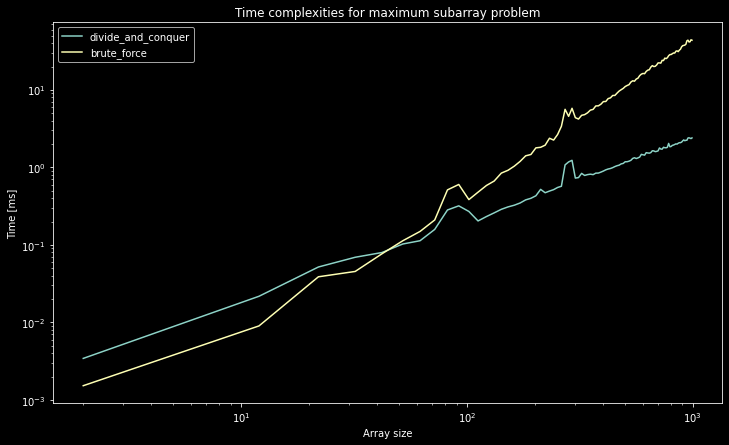

In [11]:
scores_df = pd.DataFrame(scores, index=scores['array_size'])
plt.style.use('dark_background')
scores_df[['divide_and_conquer', 'brute_force']].plot(figsize=(12, 7), logx=True, logy=True)
plt.title('Time complexities for maximum subarray problem')
plt.ylabel('Time [ms]')
plt.xlabel('Array size')

Since cross point can be approximated as about n=40, we can build combined solution.

In [12]:
def find_max_subarray_combined(array: arr.array) -> Tuple[int, int, Union[int, float]]:
    if len(array) > 40:
        return find_max_subarray(array=array, low=0, high=len(array)-1)
    return find_max_subarray_brute_force(array=array)

In [13]:
samples_number = 10
scores = defaultdict(list)
for array_size in range(2, 1000, 10):
    scores['array_size'].append(array_size)

    times_1 = []
    for _ in range(samples_number):
        random_array = build_random_array(array_size)
        start_1 = time.time()
        _, _, _ = find_max_subarray(array=random_array, low=0, high=len(random_array)-1)
        times_1.append(time.time() - start_1)
    mean_time_1 = sum(times_1) / len(times_1)
    scores['divide_and_conquer'].append(mean_time_1*1000)

    times_2 = []
    for _ in range(samples_number):
        random_array = build_random_array(array_size)
        start_2 = time.time()
        _, _, _ = find_max_subarray_brute_force(array=random_array)
        times_2.append(time.time() - start_2)
    mean_time_2 = sum(times_2) / len(times_2)
    scores['brute_force'].append(mean_time_2*1000)

    times_3 = []
    for _ in range(samples_number):
        random_array = build_random_array(array_size)
        start_3 = time.time()
        _, _, _ = find_max_subarray_combined(array=random_array)
        times_3.append(time.time() - start_3)
    mean_time_3 = sum(times_3) / len(times_3)
    scores['combined'].append(mean_time_3*1000)

    times_4 = []
    for _ in range(samples_number):
        random_array = build_random_array(array_size)
        start_4 = time.time()
        _, _, _ = find_max_subarray_linear_time(array=random_array)
        times_4.append(time.time() - start_4)
    mean_time_4 = sum(times_4) / len(times_4)
    scores['linear'].append(mean_time_4*1000)

Text(0.5, 0, 'Array size')

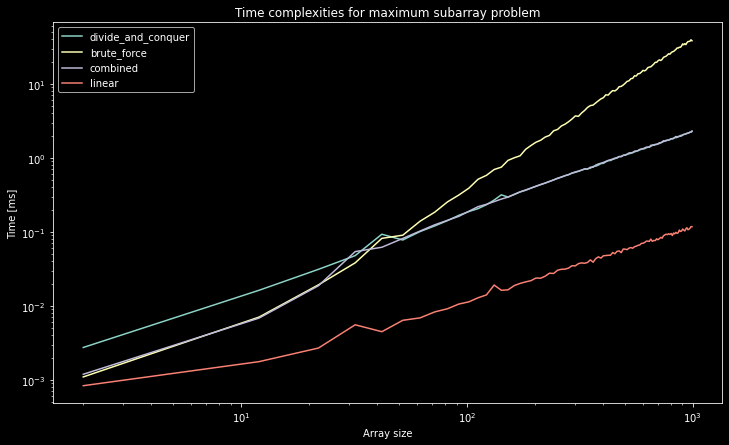

In [14]:
scores_df = pd.DataFrame(scores, index=scores['array_size'])
plt.style.use('dark_background')
scores_df[['divide_and_conquer', 'brute_force', 'combined', 'linear']].plot(figsize=(12, 7), logx=True, logy=True)
plt.title('Time complexities for maximum subarray problem')
plt.ylabel('Time [ms]')
plt.xlabel('Array size')